In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [62]:
def img_prepare(image, padding_color=(255, 255, 255)):
    
    # 이미지의 현재 크기
    height, width = image.shape
    
    # 목표 크기
    target_height, target_width = (1500, 1500)
    
    # 비율에 맞게 크기 조정
    scale = min(target_width / width, target_height / height)
    new_width = int(width * scale)
    new_height = int(height * scale)
    print(scale)
    print(new_width)
    print(new_height)
    
    resize_image1 = cv2.resize(image, dsize=(new_width,new_height))
    
    # 패딩 크기 계산
    padding_top = (target_height - new_height) // 2
    padding_bottom = target_height - new_height - padding_top
    padding_left = (target_width - new_width) // 2
    padding_right = target_width - new_width - padding_left
    
    # 패딩 추가
    padded_image = cv2.copyMakeBorder(resize_image1, padding_top, padding_bottom, padding_left, padding_right, cv2.BORDER_CONSTANT, value=padding_color)
    
    resize_image2 = cv2.resize(padded_image, dsize=(700,700))
    # 결과 이미지 저장
    return resize_image2

In [189]:
image_num = '5019'

In [190]:
image = cv2.imread('./dowon_img/'+image_num+'.png',0)

In [191]:
image.shape

(728, 764)

In [192]:
image = img_prepare(image)

1.963350785340314
1500
1429


In [193]:
thr, mask = cv2.threshold(image, 200, 1, cv2.THRESH_BINARY)
adapt_mask = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                   cv2.THRESH_BINARY_INV, 11, 10)
adapt_mask = cv2.bitwise_not(adapt_mask)

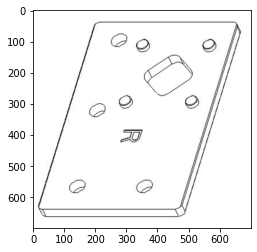

In [194]:
plt.imshow(image, cmap="gray")
plt.show()

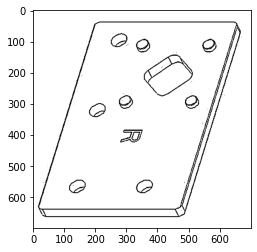

In [195]:
plt.imshow(adapt_mask, cmap="gray")
plt.show()

In [202]:
# blurred = cv2.GaussianBlur(image, (5, 5), 0)
# edges = cv2.Canny(blurred, 50, 150)
kernel = np.ones((2, 2), np.uint8)
dilated = cv2.dilate(image, kernel, iterations=1)

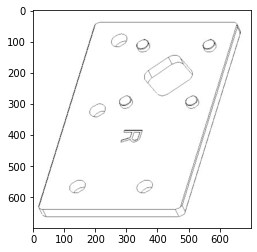

In [203]:
import matplotlib.pyplot as plt 

plt.imshow(dilated, cmap="gray")
plt.show()

In [204]:
edges = cv2.Canny(dilated, 50, 150)
test2 = cv2.bitwise_not(edges)

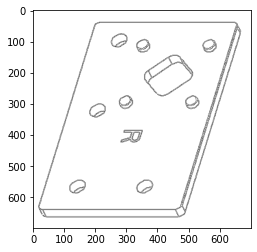

In [205]:
plt.imshow(test2, cmap="gray")
plt.show()

In [206]:
kernel = np.ones((5, 5), np.uint8)
test = cv2.dilate(edges, kernel, iterations=1)
test2 = cv2.bitwise_not(test)

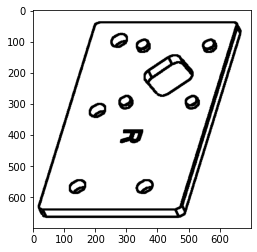

In [207]:
plt.imshow(test2, cmap="gray")
plt.show()

In [208]:
cv2.imwrite('./image_change/'+image_num+'.png', test2)

True

In [169]:
kernel = np.ones((7, 7), np.uint8)
dilated = cv2.dilate(test2, kernel, iterations=1)

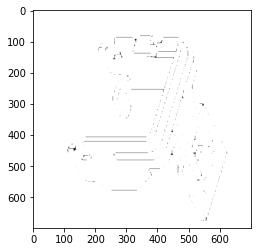

In [77]:
plt.imshow(dilated, cmap="gray")
plt.show()

In [636]:
cv2.imwrite('./image_change/'+image_num+'.png', dilated)

True